In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#freeze random for testing results
np.random.seed(6)

In [2]:
# 1. Dataset uploading and preprocessing

data = pd.read_csv("energy_efficiency_data.csv")

# one-hot vector enconding for categorical futures
data = pd.get_dummies(data, columns=['Orientation'], prefix=['Orientation'], dtype=int)
data = pd.get_dummies(data, columns=['Glazing Area Distribution'], prefix=['Glazing Area Distribution'], dtype=int)

to_scale = [
    "# Relative Compactness", 
    "Surface Area", 
    "Wall Area", 
    "Roof Area", 
    "Overall Height", 
    "Glazing Area"
]

# scaling feauters on interval [0, 1] 
for category in to_scale:
    data[category] = (data[category] - data[category].min()) / (data[category].max() - data[category].min())
    
scaled_data = data.copy()

# shuffling data
shuffled_data = scaled_data.sample(frac=1)

# dividing data into training and test samples
train_data = shuffled_data.iloc[:int(0.75 * len(data))]
test_data = shuffled_data.iloc[int(0.75 * len(data)):]

# highlighting features and target variable
X_train = train_data.drop(columns=['Heating Load', 'Cooling Load']).values
y_train = train_data['Heating Load'].values.reshape(-1,1)
X_test = test_data.drop(columns=['Heating Load', 'Cooling Load']).values
y_test = test_data['Heating Load'].values.reshape(-1,1)

In [3]:
# 2. Neural Network Functions

# initializing layer weights and bias
def initialize_layer(input_dim, output_dim):
    weights = np.random.uniform(-1/np.sqrt(input_dim), 1/np.sqrt(input_dim), (input_dim, output_dim))
    biases = np.zeros((1, output_dim))
    return weights, biases

# activation function 
def tanh(x):
    return np.tanh(x)

# def sigmoid(x):    
#      return 1 / (1 + np.exp(-x))

# derivative of function 
def dtanh(x):
    return 1.0 - np.tanh(x)**2

# def dsigmoid(x):
#      return sigmoid(x) * (1 - sigmoid(x))

# layers and sizes
#input layer
input_dim = X_train.shape[1]
# hidden layer
hidden_dim = 8
# output layer
output_dim = y_train.shape[1]

# weights and bias for hidden and output layers
W1, b1 = initialize_layer(input_dim, hidden_dim)
W2, b2 = initialize_layer(hidden_dim, output_dim)

In [4]:
# 3. Training!

learning_rate = 0.005
epochs = 5001

losses = []
losses_test = []

for epoch in range(epochs):
    # forward propagation
    Z1 = np.dot(X_train, W1) + b1
    A1 = tanh(Z1)
#    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2

    # backward propagation
    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / len(X_train)
    db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X_train)

    # calc gradients to update weights and biases
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * dtanh(Z1)
#    dZ1 = dA1 * dsigmoid(Z1)
    dW1 = np.dot(X_train.T, dZ1) / len(X_train)
    db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X_train)

    # update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # compute loss (mean squared error for simplicity)
    loss = np.mean((A2 - y_train) ** 2)
    
    # saving losses
    losses.append(loss)
    
    if epoch % 500 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {loss}")
        
        
        
    # forward propagation
    Z1 = np.dot(X_test, W1) + b1
    A1 = tanh(Z1)
#    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2   
    
    loss_test = np.mean((A2 - y_test) ** 2)
    
    # saving losses
    losses_test.append(loss_test)

Epoch 0/5001 - Loss: 596.0610777534017
Epoch 500/5001 - Loss: 9.34078385778453
Epoch 1000/5001 - Loss: 6.866956832308934
Epoch 1500/5001 - Loss: 6.623882036525119
Epoch 2000/5001 - Loss: 6.455316048061887
Epoch 2500/5001 - Loss: 6.227144372806662
Epoch 3000/5001 - Loss: 5.958533760606421
Epoch 3500/5001 - Loss: 5.69934938916287
Epoch 4000/5001 - Loss: 5.467634268271108
Epoch 4500/5001 - Loss: 5.257934963111168
Epoch 5000/5001 - Loss: 5.0604185316144275


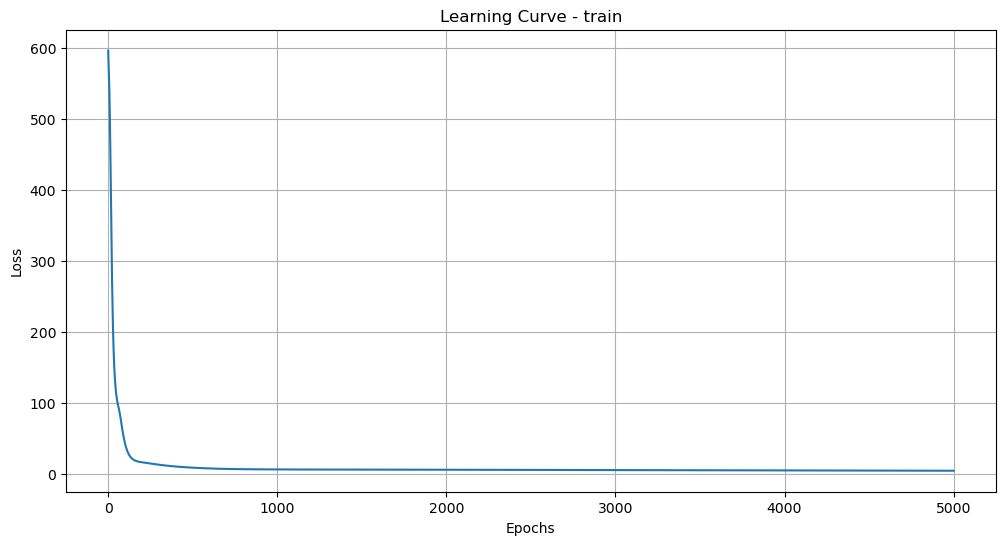

In [5]:
# visualize the learning curve (train data)
plt.figure(figsize=(12, 6))
plt.plot(losses)
plt.title("Learning Curve - train")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

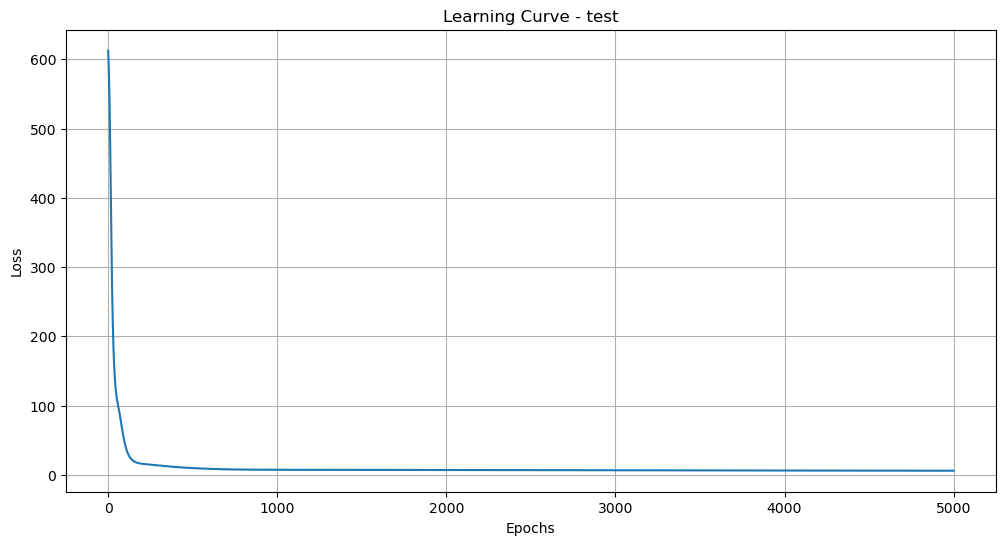

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(losses_test)
plt.title("Learning Curve - test")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

Training MSE: 5.5726370128476175
Training RMSE: 2.360643347235583
Predicted 0: 12.80, Actual: 12.63
-------
Predicted 1: 14.27, Actual: 13.17
-------
Predicted 2: 13.95, Actual: 14.28
-------
Predicted 3: 31.09, Actual: 36.7
-------
Predicted 4: 8.90, Actual: 8.6
-------
Predicted 5: 28.66, Actual: 23.54
-------
Predicted 6: 13.98, Actual: 14.71
-------
Predicted 7: 27.74, Actual: 28.62
-------
Predicted 8: 13.97, Actual: 14.18
-------
Predicted 9: 12.48, Actual: 11.42
-------


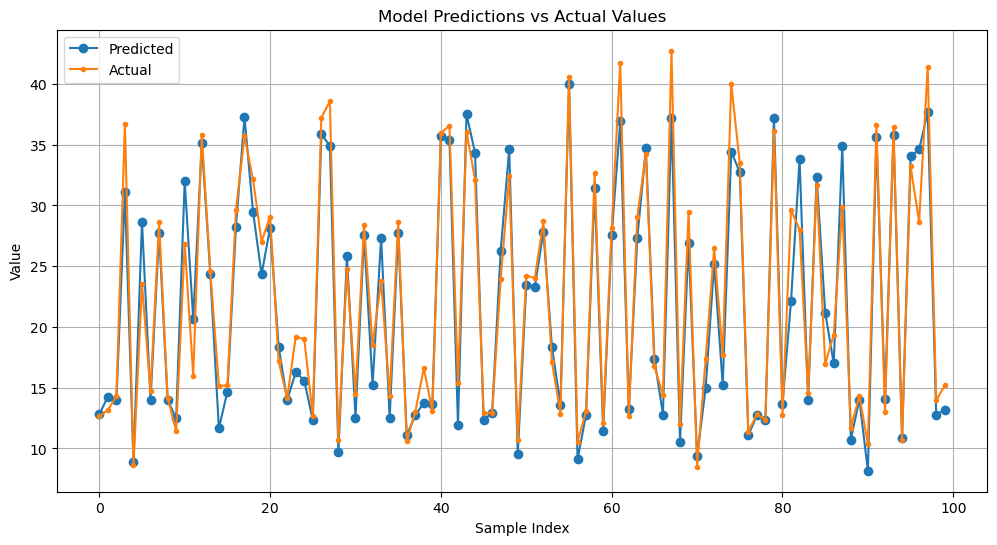

In [7]:
Z1 = np.dot(X_train, W1) + b1
A1 = tanh(Z1)
# A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = Z2


# calculate mse for train data
mse = np.mean((A2 - y_train) ** 2)
rmse = np.sqrt(mse)

print(f"Training MSE: {mse}")
print(f"Training RMSE: {rmse}")

for i in range(10):
    print(f"Predicted {i}: {A2[i][0]:.2f}, Actual: {y_train[i][0]}")
    print("-------")
    
# visualize the predict model against actual values (train data)
plt.figure(figsize=(12, 6))
plt.plot(A2[:100], label="Predicted", linestyle='-', marker='o')
plt.plot(y_train[:100], label="Actual", linestyle='-', marker='.')
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Test MSE: 5.95987773534637
Test RMSE: 2.441286082241565
Predicted 0: 12.35, Actual: 11.45
-------
Predicted 1: 29.00, Actual: 32.31
-------
Predicted 2: 7.74, Actual: 6.85
-------
Predicted 3: 27.53, Actual: 23.86
-------
Predicted 4: 28.40, Actual: 28.6
-------
Predicted 5: 15.61, Actual: 14.34
-------
Predicted 6: 34.52, Actual: 38.84
-------
Predicted 7: 27.34, Actual: 29.39
-------
Predicted 8: 10.60, Actual: 11.2
-------
Predicted 9: 28.17, Actual: 29.4
-------


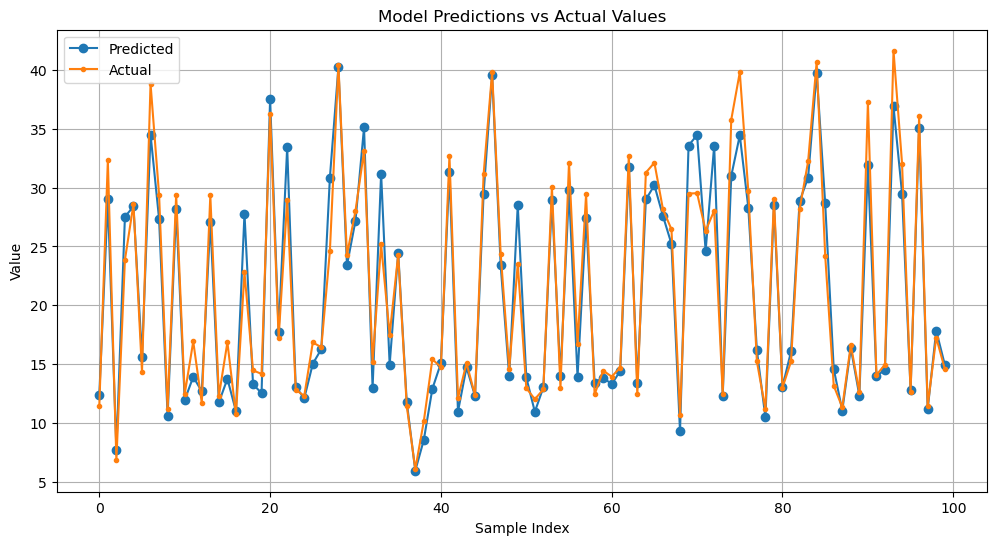

In [8]:
# 4. Testing the Neural Network
# forward propagation for test samples
Z1 = np.dot(X_test, W1) + b1
A1 = tanh(Z1)
#A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2) + b2
A2 = Z2


# calculate mse for test data
mse = np.mean((A2 - y_test) ** 2)
rmse = np.sqrt(mse)

print(f"Test MSE: {mse}")
print(f"Test RMSE: {rmse}")

for i in range(10):
    print(f"Predicted {i}: {A2[i][0]:.2f}, Actual: {y_test[i][0]}")
    print("-------")
    
# visualize the predict model against actual values (test data)
plt.figure(figsize=(12, 6))
plt.plot(A2[:100], label="Predicted", linestyle='-', marker='o')
plt.plot(y_test[:100], label="Actual", linestyle='-', marker='.')
plt.title("Model Predictions vs Actual Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()